In [8]:
# load json file

import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from datetime import date

data_path = './transaction-data-adhoc-analysis.json'

transactions = pd.read_json(data_path)

transactions

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [17]:
transactions[["first_purchase", "second_purchase", "third_purchase"]] = transactions["transaction_items"].str.split(";", expand = True)

In [18]:
transactions[["brand1", "product1", "total_number1"]] = transactions["first_purchase"].str.split(",", expand = True)
transactions[["brand2", "product2", "total_number2"]] = transactions["second_purchase"].str.split(",", expand = True)
transactions[["brand3", "product3", "total_number3"]] = transactions["third_purchase"].str.split(",", expand = True)

In [19]:
def remove_char(x):
    characters_to_remove = "() x"
    new_string = x
    
    if x == None:
        return int('0')
    
    else:
        for character in characters_to_remove:
          new_string = new_string.replace(character, "")

    return int(new_string)

transactions["updated_total1"] = transactions["total_number1"].apply(lambda x: remove_char(x))
transactions["updated_total2"] = transactions["total_number2"].apply(lambda x: remove_char(x))
transactions["updated_total3"] = transactions["total_number3"].apply(lambda x: remove_char(x))

In [20]:
condition1 = [(transactions["product1"] == "Beef Chicharon"),
                (transactions["product1"] == "Gummy Vitamins"),
                (transactions["product1"] == "Gummy Worms"),
                (transactions["product1"] == "Kimchi and Seaweed"),
                (transactions["product1"] == "Nutrional Milk"),
                (transactions["product1"] == "Orange Beans"),
                (transactions["product1"] == "Yummy Vegetables")]

condition2 = [(transactions["product2"] == "Beef Chicharon"),
                (transactions["product2"] == "Gummy Vitamins"),
                (transactions["product2"] == "Gummy Worms"),
                (transactions["product2"] == "Kimchi and Seaweed"),
                (transactions["product2"] == "Nutrional Milk"),
                (transactions["product2"] == "Orange Beans"),
                (transactions["product2"] == "Yummy Vegetables")]

condition3 = [(transactions["product3"] == "Beef Chicharon"),
                (transactions["product3"] == "Gummy Vitamins"),
                (transactions["product3"] == "Gummy Worms"),
                (transactions["product3"] == "Kimchi and Seaweed"),
                (transactions["product3"] == "Nutrional Milk"),
                (transactions["product3"] == "Orange Beans"),
                (transactions["product3"] == "Yummy Vegetables")]

prices = [1299, 1500, 150, 799, 1990, 199, 500]

transactions["product_price1"] = np.select(condition1, prices)
transactions["product_price2"] = np.select(condition2, prices)
transactions["product_price3"] = np.select(condition3, prices)

transactions["purchase_value1"] = transactions["updated_total1"] * transactions["product_price1"]
transactions["purchase_value2"] = transactions["updated_total2"] * transactions["product_price2"]
transactions["purchase_value3"] = transactions["updated_total3"] * transactions["product_price3"]

transactions

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,first_purchase,...,total_number3,updated_total1,updated_total2,updated_total3,product_price1,product_price2,product_price3,purchase_value1,purchase_value2,purchase_value3
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",...,None,4,0,0,1299,0,0,5196,0,0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",...,(x1),3,4,1,1299,1990,199,3897,7960,199
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",...,None,3,2,0,1500,500,0,4500,1000,0
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,"HealthyKid 3+,Yummy Vegetables,(x1)",...,None,1,0,0,500,0,0,500,0,0
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,"Candy City,Orange Beans,(x3)",...,(x1),3,4,1,199,150,1500,597,600,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,"Exotic Extras,Kimchi and Seaweed,(x2)",...,None,2,1,0,799,1990,0,1598,1990,0
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,"HealthyKid 3+,Yummy Vegetables,(x1)",...,(x4),1,1,4,500,799,199,500,799,796
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,"Candy City,Orange Beans,(x4)",...,(x4),4,4,4,199,150,500,796,600,2000
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",...,None,2,2,0,1990,150,0,3980,300,0


In [21]:
# table 1 - start

transactions['month'] = pd.DatetimeIndex(transactions['transaction_date']).month
transactions['month']

0        1
1        1
2        1
3        1
4        1
        ..
83031    6
83032    6
83033    6
83034    6
83035    6
Name: month, Length: 83036, dtype: int64

In [22]:
# table 1 - cont.

x = transactions.groupby([transactions["month"], transactions["product1"]])[["updated_total1"]].sum()
y = transactions.groupby([transactions["month"], transactions["product2"]])["updated_total2"].sum()
z = transactions.groupby([transactions["month"], transactions["product3"]])["updated_total3"].sum()

monthly_total = pd.concat([x, y, z], axis=1)
monthly_total

updated_total1  updated_total2  updated_total3
month                                                                   
1     Beef Chicharon                4957            3143            1565
      Gummy Vitamins                4853            3116            1712
      Gummy Worms                   4844            3201            1514
      Kimchi and Seaweed            4857            3197            1622
      Nutrional Milk                4855            3301            1571
      Orange Beans                  4947            3343            1484
      Yummy Vegetables              5080            3278            1601
2     Beef Chicharon                5099            3323            1579
      Gummy Vitamins                5078            3296            1606
      Gummy Worms                   4818            3361            1817
      Kimchi and Seaweed            4881            3342            1726
      Nutrional Milk                4844            3203            1644
      Orange Beans                  5162            3285            1590
      Yummy Vegetables              4930            3662            1664
3     Beef Chicharon                4813            3387            1616
      Gummy Vitamins                5087            3337            1721
      Gummy Worms                   5178            3174            1634
      Kimchi and Seaweed            5047            3294            1626
      Nutrional Milk                4757            3466            1653
      Orange Beans                  4783            3232            1596
      Yummy Vegetables              4888            3299            1709
4     Beef Chicharon                4898            3287            1705
      Gummy Vitamins                4859            3280            1703
      Gummy Worms                   4881            3327            1835
      Kimchi and Seaweed            4872            3446            1603
      Nutrional Milk                4785            3290            1711
      Orange Beans                  4982            3357            1575
      Yummy Vegetables              5041            3227            1593
5     Beef Chicharon                4945            3382            1701
      Gummy Vitamins                4978            3204            1766
      Gummy Worms                   4946            3228            1627
      Kimchi and Seaweed            4859            3222            1692
      Nutrional Milk                4856            3383            1642
      Orange Beans                  4999            3351            1614
      Yummy Vegetables              4965            3154            1616
6     Beef Chicharon                4844            3353            1705
      Gummy Vitamins                4899            3317            1764
      Gummy Worms                   5024            3281            1629
      Kimchi and Seaweed            5047            3398            1659
      Nutrional Milk                4783            3335            1649
      Orange Beans                  5024            3303            1779
      Yummy Vegetables              4971            3220            1531

In [24]:
# table 1 - cont.

monthly_total["sum_all"] = monthly_total["updated_total1"] + monthly_total["updated_total2"] + monthly_total["updated_total3"]
monthly_total

updated_total1  updated_total2  updated_total3  \
month                                                                      
1     Beef Chicharon                4957            3143            1565   
      Gummy Vitamins                4853            3116            1712   
      Gummy Worms                   4844            3201            1514   
      Kimchi and Seaweed            4857            3197            1622   
      Nutrional Milk                4855            3301            1571   
      Orange Beans                  4947            3343            1484   
      Yummy Vegetables              5080            3278            1601   
2     Beef Chicharon                5099            3323            1579   
      Gummy Vitamins                5078            3296            1606   
      Gummy Worms                   4818            3361            1817   
      Kimchi and Seaweed            4881            3342            1726   
      Nutrional Milk                4844            3203            1644   
      Orange Beans                  5162            3285            1590   
      Yummy Vegetables              4930            3662            1664   
3     Beef Chicharon                4813            3387            1616   
      Gummy Vitamins                5087            3337            1721   
      Gummy Worms                   5178            3174            1634   
      Kimchi and Seaweed            5047            3294            1626   
      Nutrional Milk                4757            3466            1653   
      Orange Beans                  4783            3232            1596   
      Yummy Vegetables              4888            3299            1709   
4     Beef Chicharon                4898            3287            1705   
      Gummy Vitamins                4859            3280            1703   
      Gummy Worms                   4881            3327            1835   
      Kimchi and Seaweed            4872            3446            1603   
      Nutrional Milk                4785            3290            1711   
      Orange Beans                  4982            3357            1575   
      Yummy Vegetables              5041            3227            1593   
5     Beef Chicharon                4945            3382            1701   
      Gummy Vitamins                4978            3204            1766   
      Gummy Worms                   4946            3228            1627   
      Kimchi and Seaweed            4859            3222            1692   
      Nutrional Milk                4856            3383            1642   
      Orange Beans                  4999            3351            1614   
      Yummy Vegetables              4965            3154            1616   
6     Beef Chicharon                4844            3353            1705   
      Gummy Vitamins                4899            3317            1764   
      Gummy Worms                   5024            3281            1629   
      Kimchi and Seaweed            5047            3398            1659   
      Nutrional Milk                4783            3335            1649   
      Orange Beans                  5024            3303            1779   
      Yummy Vegetables              4971            3220            1531   

                          sum_all  
month                              
1     Beef Chicharon         9665  
      Gummy Vitamins         9681  
      Gummy Worms            9559  
      Kimchi and Seaweed     9676  
      Nutrional Milk         9727  
      Orange Beans           9774  
      Yummy Vegetables       9959  
2     Beef Chicharon        10001  
      Gummy Vitamins         9980  
      Gummy Worms            9996  
      Kimchi and Seaweed     9949  
      Nutrional Milk         9691  
      Orange Beans          10037  
      Yummy Vegetables      10256  
3     Beef Chicharon         9816  
      Gummy Vitamins        10145  
      Gummy Worms            9986

In [29]:
n = transactions.groupby([transactions["month"],transactions["product1"]])["purchase_value1"].sum()
v = transactions.groupby([transactions["month"],transactions["product2"]])["purchase_value2"].sum()
e = transactions.groupby([transactions["month"],transactions["product3"]])["purchase_value3"].sum()

final_tv = pd.concat([n, v, e], axis=1)

final_tv = final_tv["purchase_value1"] + final_tv["purchase_value2"] + final_tv["purchase_value3"]
final_tv

month                    
1      Beef Chicharon        12554835
       Gummy Vitamins        14521500
       Gummy Worms            1433850
       Kimchi and Seaweed     7731124
       Nutrional Milk        19356730
       Orange Beans           1945026
       Yummy Vegetables       4979500
2      Beef Chicharon        12991299
       Gummy Vitamins        14970000
       Gummy Worms            1499400
       Kimchi and Seaweed     7949251
       Nutrional Milk        19285090
       Orange Beans           1997363
       Yummy Vegetables       5128000
3      Beef Chicharon        12750984
       Gummy Vitamins        15217500
       Gummy Worms            1497900
       Kimchi and Seaweed     7963633
       Nutrional Milk        19653240
       Orange Beans           1912589
       Yummy Vegetables       4948000
4      Beef Chicharon        12847110
       Gummy Vitamins        14763000
       Gummy Worms            1506450
       Kimchi and Seaweed     7926879
       Nutrional Milk   

In [32]:
# check which months customers transacted in
# make it shorter than making def month_pod1(January): , month_pod2(January, February): , and so on

# truth table | utilize pd.factorize 

i, r = pd.factorize(df.name)
j, c = pd.factorize(df.transaction_date.dt.month)
b = np.zeros((r.size, c.size), int)
b[i, j] = 1

customer_df = pd.DataFrame(b, r, c)
customer = pd.DataFrame() 
months = []

# stacks/compiles total transactions

for i in set(df.transaction_date.dt.month):
    months.append(i)
    total = customer_df[months].sum(axis=1)
    customer[i] = total

In [36]:
# repeater, inactive, engaged - start

engaged = []
for i in set(df.transaction_date.dt.month):
    engaged.append(len(customer.loc[customer[i] == i]))

inactive = [0]
for i in set(df.transaction_date.dt.month):
    try:
        inactive.append(len(customer.loc[(customer[i+1] == customer[i]) & (customer[i] > 0)]))
    #when it reaches an error which is when it reaches the 6th month, the for loop breaks
    except KeyError:
        break

repeaters = [0]
for i in set(df.transaction_date.dt.month):
    try:
        repeaters.append(len(customer_df.loc[(customer_df[i]+customer_df[i+1] == 2)]))
    except KeyError:
        break

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


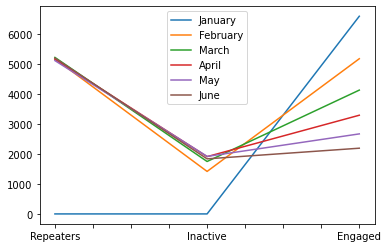

In [39]:
# repeater, inactive, engaged - cont.
# append

customer_metrics = []
customer_metrics.append(repeaters)
customer_metrics.append(inactive)
customer_metrics.append(engaged)

customer_behavior_lg = pd.DataFrame(customer_metrics, columns = ['January', 'February', 'March', 'April', 'May', 'June'], index =['Repeaters','Inactive','Engaged'])
display(customer_behavior_lg)

# display data using line graph
# the graph in question

customer_activity.plot.line()
plt.show()

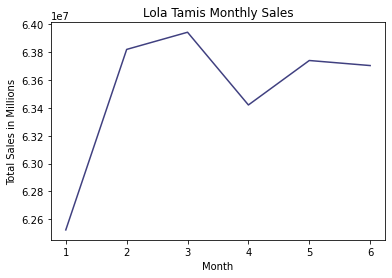

In [41]:
# additional diagrams
# monthly sales

monthly_sales = transactions.loc[:,["month", "transaction_value"]].groupby(transactions["month"])["transaction_value"].sum()

x = ("1", "2", "3", "4", "5", "6")
y = monthly_sales
plt.plot(x, y, '#404080')
plt.ylabel("Total Sales in Millions")
plt.xlabel("Month")
plt.title("Lola Tamis Monthly Sales")
plt.show()

In [48]:
# products sold in transaction

y = transactions.groupby(transactions["product1"])["updated_total1"].sum()
v = transactions.groupby(transactions["product2"])["updated_total2"].sum()
e = transactions.groupby(transactions["product3"])["updated_total3"].sum()

total_final = pd.concat([y,v,e], axis = 1)
total_final

,updated_total1,updated_total2,updated_total3
Beef Chicharon,29556,19875,9871
Gummy Vitamins,29754,19550,10272
Gummy Worms,29691,19572,10056
Kimchi and Seaweed,29563,19899,9928
Nutrional Milk,28880,19978,9870
Orange Beans,29897,19871,9638
Yummy Vegetables,29875,19840,9714


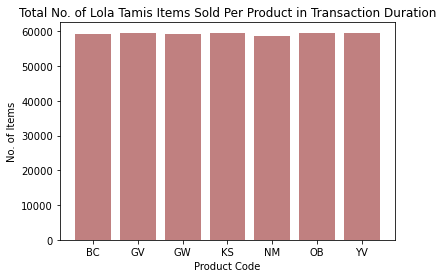

In [46]:
product_df = total_final["updated_total1"] + total_final["updated_total2"] + total_final["updated_total3"]

plt.bar(height = product_df, x = ("BC","GV", "GW", "KS", "NM", "OB", "YV"), color = '#c08080') 
    # BC ==> Beef Chicharon 
    # GV ==> Gummy Vitamins
    # GW ==> Gummy Worms
    # KS ==> Kimchi and Seaweed
    # NM ==> Nutrional Milk
    # OB ==> Orange Beans
    # YV ==> Yummy Vegetables 
plt.xlabel("Product Code")
plt.ylabel("No. of Items")
plt.title("Total No. of Lola Tamis Items Sold Per Product in Transaction Duration")
plt.show()

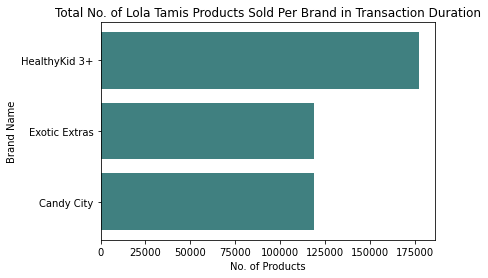

In [50]:
# total products sold per brand 

y = transactions.groupby(transactions["brand1"])["updated_total1"].sum()
v = transactions.groupby(transactions["brand2"])["updated_total2"].sum()
e = transactions.groupby(transactions["brand3"])["updated_total3"].sum()

brand = pd.concat([y, v, e], axis = 1)

brand_total = brand["updated_total1"] + brand["updated_total2"] + brand["updated_total3"]
plt.barh(y = ("Candy City", "Exotic Extras", "HealthyKid 3+"), width = brand_total, color = '#408080')
plt.ylabel("Brand Name")
plt.xlabel("No. of Products")
plt.title("Total No. of Lola Tamis Products Sold Per Brand in Transaction Duration")
plt.show()